# Assignment 1: Environment Setup and Python Basics
**Due Date:** January 16, 2026

**Name:** Elise Etrheim

## Instructions
1.  Complete the tasks in the cells below.
2.  Ensure all code runs without errors.
3.  Submit your completed notebook via Canvas (or GitHub if instructed).

## Task 1: Environment Verification

Write a Python script to:
1.  Import `sys`, `numpy`, and `matplotlib`.
2.  Print the Python version.
3.  Print the versions of `numpy` and `matplotlib`.

In [1]:
# Your code here
import sys
import platform
import numpy as np
import matplotlib
import hyperspy.api as hspy
import py4DSTEM
import scipy as sp

print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Operating system: {platform.platform()}")
print(f"SciPy version: {sp.__version__}")
print(f"py4DSTEM version: {py4DSTEM.__version__}")
print(f"HyperSpy version: {hspy.__version__}")

Python version: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:23:22) [MSC v.1944 64 bit (AMD64)]
NumPy version: 2.2.6
Matplotlib version: 3.10.8
Operating system: Windows-10-10.0.26100-SP0
SciPy version: 1.15.2
py4DSTEM version: 0.14.16
HyperSpy version: 2.3.0


## Task 2: Automate Project Structure

Write a Python script using `os` or `pathlib` to programmatically create the following directory structure inside a folder named `assignment_01_output`:
```
assignment_01_output/
├── data/
│   ├── raw/
│   └── processed/
├── figures/
└── src/
```

In [2]:
# Your code here
import os

base_dir = "assignment_01_output"
subdirs = [
    "data/raw",
    "data/processed",
    "figures",
    "src"
]

for subdir in subdirs:
    path = os.path.join(base_dir, subdir)
    os.makedirs(path, exist_ok=True)
    print(f"Created directory: {path}")

Created directory: assignment_01_output\data/raw
Created directory: assignment_01_output\data/processed
Created directory: assignment_01_output\figures
Created directory: assignment_01_output\src


## Task 3: Ensure Reproducibility

Demonstrate reproducibility by:
1.  Setting a random seed using `numpy.random.seed()`.
2.  Generating an array of 5 random numbers.
3.  Printing the array.
4.  Run the cell multiple times to verify that the numbers remain the same.

In [3]:
# Your code here
import numpy as np

# Set the seed
np.random.seed(42)

# Generate random numbers
random_numbers = np.random.rand(5)
print(f"Random numbers: {random_numbers}")

Random numbers: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


## Task 4: Explore EM Data Visualization
1. Download and load the example dataset using Hyperspy or Numpy.
2. Display the data as an image or pattern in Jupyter.
3. Compute basic image statistics such as mean intensity and standard deviation.
4. Plot a histogram of pixel intensities.
5. Add brief text cells explaining what you observe in the plots.

Mean intensity: 39.95973609239198
Standard deviation: 37.03853241909996


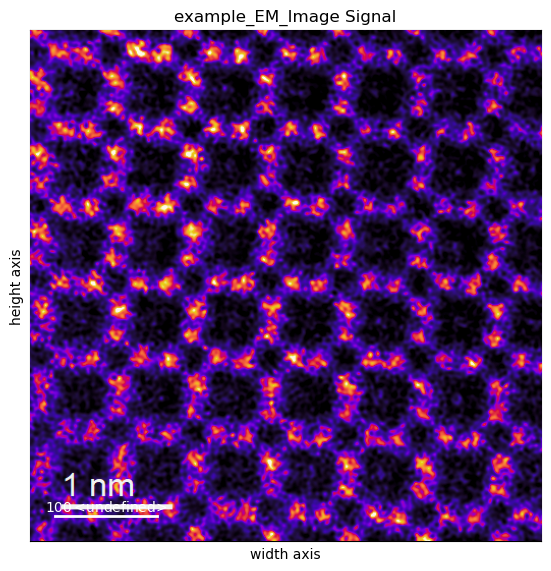

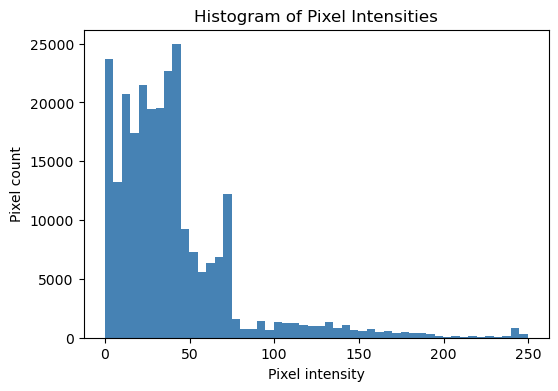

In [2]:
# Your cpde here
import hyperspy.api as hs
signal = hs.load("example_EM_Image.tif")
signal.plot()

# Compute basic image statistics
import numpy as np

rgb = signal.data.view(np.uint8).reshape(signal.data.shape + (3,))
gray = 0.299*rgb[:,:,0]+0.587*rgb[:,:,1]+0.114*rgb[:,:,2]

mean_intensity = np.mean(gray)
std_intensity = np.std(gray)
print("Mean intensity:",mean_intensity)
print("Standard deviation:",std_intensity)

# Plot histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(gray.ravel(),bins=50,color="steelblue")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel count")
plt.title("Histogram of Pixel Intensities")
plt.show()

### *Extra exploration of data visualization and analysis*

<Signal2D, title: , dimensions: (|503, 503)>
[('R', 'u1'), ('G', 'u1'), ('B', 'u1')]
(503, 503)
<Axes manager, axes: (|503, 503)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
---------------- | ------ | ------ | ------- | ------- | ------ 
     height axis |    503 |      0 |       0 |       1 | <undefined> 
      width axis |    503 |      0 |       0 |       1 | <undefined> 
Mean intensity: <Signal2D, title: Grayscale example_EM_Image Signal, dimensions: (|503, 503)>
Standard deviation intensity: <Signal2D, title: Grayscale example_EM_Image Signal, dimensions: (|503, 503)>
<Signal1D, title: Grayscale example_EM_Image Signal histogram, dimensions: (|50)>


C:\Users\elise\miniforge3\envs\matsci465\lib\site-packages\rsciio\utils\rgb_tools.py:62: VisibleDeprecationWarning: The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
  warnings.warn(


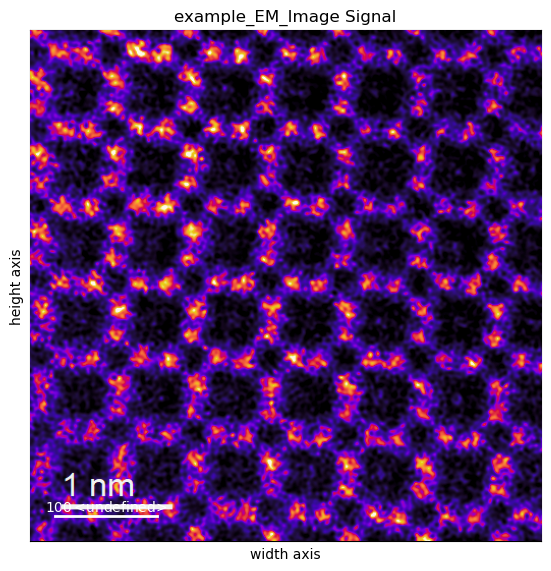

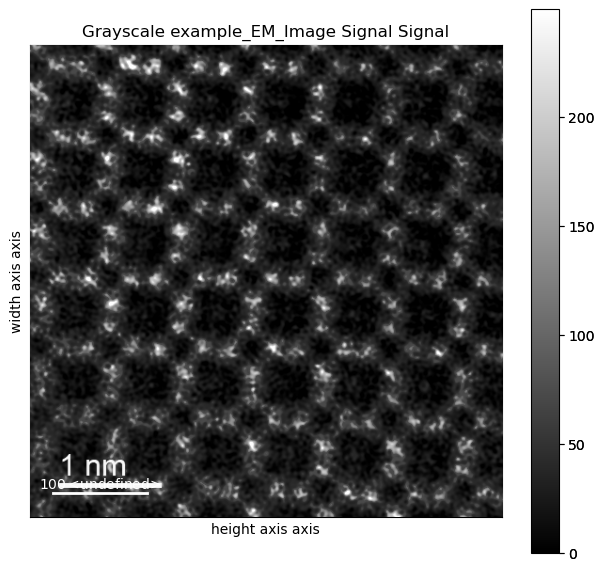

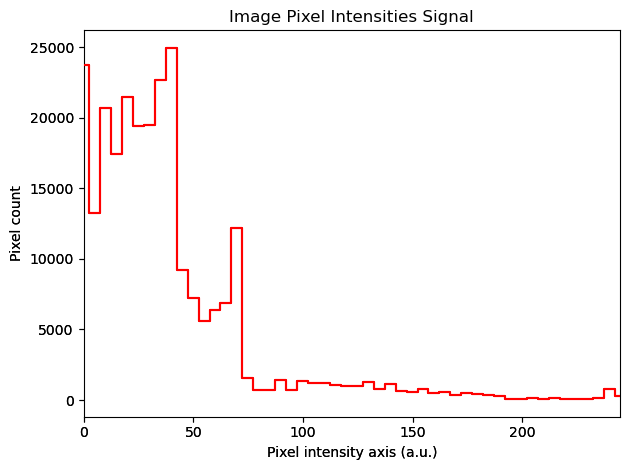

In [42]:
# Your code here
import hyperspy.api as hs
import numpy as np

# Inspect image
s = hs.load("example_EM_Image.tif")
print(s)
print(s.data.dtype)
print(s.data.shape)
s.plot()

# Convert RGB to grayscale intensity
s_data_gray = (0.299*s.data['R'].astype(float)+0.587*s.data['G'].astype(float)+0.114*s.data['B'].astype(float))
s_gray = hs.signals.Signal2D(s_data_gray)
am = s_gray.axes_manager
am[0].name = "height axis"
am[1].name = "width axis"
print(am)
s_gray.metadata.General.title = "Grayscale example_EM_Image Signal"
s_gray.plot()

# Compute basic image statistics
mean_intensity = s_gray.mean()
std_intensity = s_gray.std()

print("Mean intensity:", mean_intensity)
print("Standard deviation intensity:", std_intensity)

# Plot histogram
hist = s_gray.get_histogram(bins=50)
print(hist)
ham = hist.axes_manager
hist.metadata.Signal.quantity = "Pixel count" 
hist.metadata.Signal.units = "counts"
hist.metadata.General.title = "Image Pixel Intensities"
ham[0].name = "Pixel intensity"
ham[0].units = "a.u."
hist.plot()

### Observations:
1. From the histogram, I can observe that the data is skewed towards low intensities, with the peak pixel intensity around ~40 a.u. This means that the image is mostly dark, which aligns with the image pattern displayed earlier.
2. With that said, there are significantly fewer pixels with high intensity (above 100), suggesting some sparse, bright features. 
3. The image doesn't appear to be overexposed or underexposed. There aren't sharp, unexplained spikes at either the upper or lower bounds of pixel intensity. **However, the scale bar, which appears as a high intensity region, is embedded into the data file. It is being incorporated into the data analysis and painting an incorrect image of the EM data.**

#### *Image cropping for more accurate data capture and analysis*

Mean intensity: 38.372598676471696
Standard deviation intensity: 33.82051405636


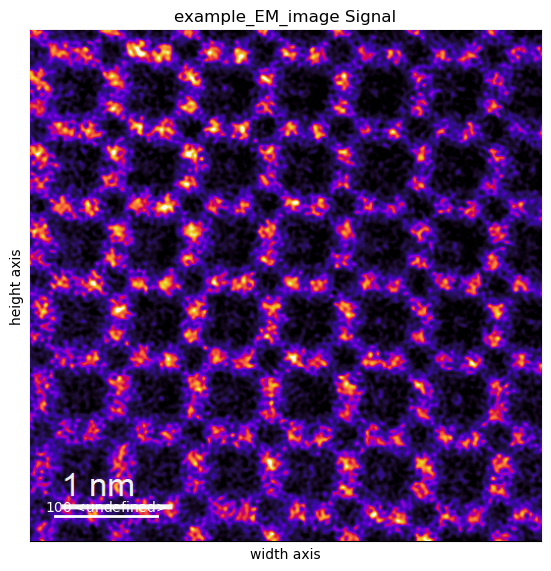

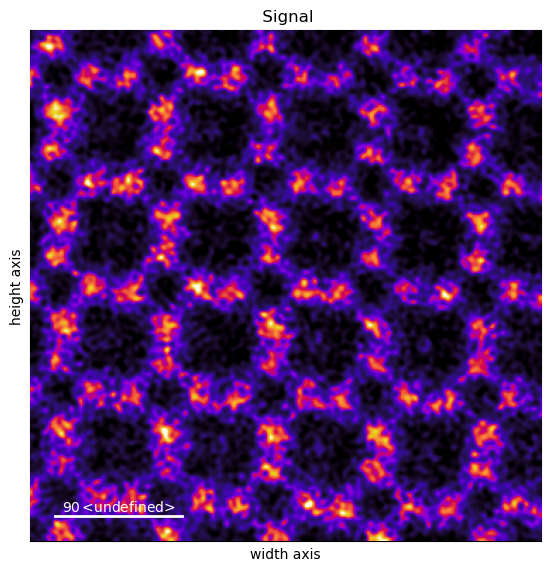

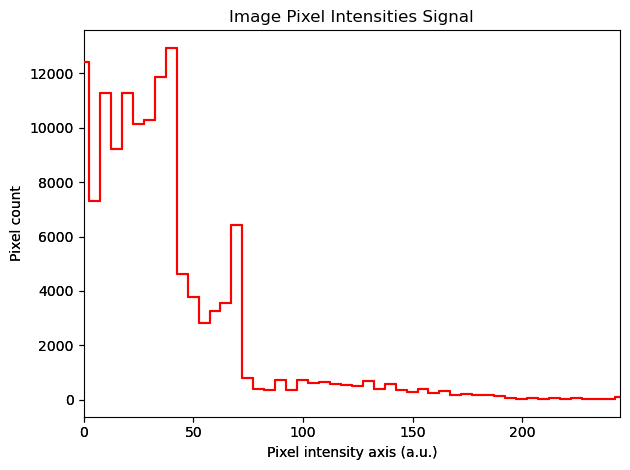

In [21]:
# Set up
import hyperspy.api as hs
import numpy as np

# Inspect and display image
s = hs.load("example_EM_image.tif")
s.plot()

# Crop image to remove embedded scale bar
crop_s = s.isig[140:503,140:503]
crop_s.plot()

# Compress rgb channels to grayscale
crop_s_data_gray = (0.299*crop_s.data['R'].astype(float)+0.587*crop_s.data['G'].astype(float)+0.114*crop_s.data['B'].astype(float))
crop_s_gray = hs.signals.Signal2D(crop_s_data_gray)

# Compute basic statistics
mean_intensity = crop_s_data_gray.mean()
std_intensity = crop_s_data_gray.std()

print("Mean intensity:", mean_intensity)
print("Standard deviation intensity:", std_intensity)

# Plot histogram of pixel intensities
hist = crop_s_gray.get_histogram(bins=50)
ham = hist.axes_manager
hist.metadata.Signal.quantity = "Pixel count" 
hist.metadata.Signal.units = "counts"
hist.metadata.General.title = "Image Pixel Intensities"
ham[0].name = "Pixel intensity"
ham[0].units = "a.u."
hist.plot()

### Additional Observations: 
After cropping the image to remove the scale bar, the mean intensity and the standard deviation both decreased. 
The mean intensity **decreased** from ~40 a.u. to ~38 a.u. while the standard deviation decreased from ~37 a.u. to ~34 a.u. 
A decrease in both of these numbers captures the removal of the high intensity scale bar that previously artificially increased the mean intensity and standard deviation of the data. 